In [1]:
import pandas as pd
from nixtla import NixtlaClient

In [7]:
# Get your API Key at dashboard.nixtla.io

# 1. Instantiate the NixtlaClient
nixtla_client = NixtlaClient(api_key = 'nixak-Up2ixKuRud70hfWebsjsHZCxvDeCLmFSgKSzE9biAqTwmhDMv7B8ikoWdUvKFai9U8K3fCwU4cz8tihX')

In [47]:
df = pd.read_excel('Data_Thiago/greycom_sales_noOut.xlsx')

In [48]:

#rename columns to something more understandable
df.rename(columns={'DataEmissao':'date', 'Qtd':'quant'}, inplace=True)

#convert date column to datetime type
df['date'] = pd.to_datetime(df['date'])

df['day_of_week'] = df['date'].dt.day_name()


In [ ]:
df['date'] = df['date'].dt.floor('D') #dropping hourly data
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df

In [51]:
df_collapsed = df.groupby(['SKU', 'date'], as_index=False).agg({'quant': 'sum'})
df_collapsed['SKU'].nunique() #number of unique SKUs

150

In [52]:
df_s = df[df['SKU'] == 'TC251'] #arbitrary SKUs to make calculation easier 
sku = df_s.iloc[0, 0]

df_c_s = df_s.groupby(['SKU', 'date'], as_index=False).agg({'quant': 'sum'}) #collapsed dataset for one specific SKU

df_c_s['Date'] = df_c_s['date']
df_c_s.set_index('date', inplace=True)
df_c_s.index = pd.to_datetime(df_c_s.index)

df_c_s = df_c_s.loc[(df_c_s.index > '2024-02-20')].copy() #using only relevant dates

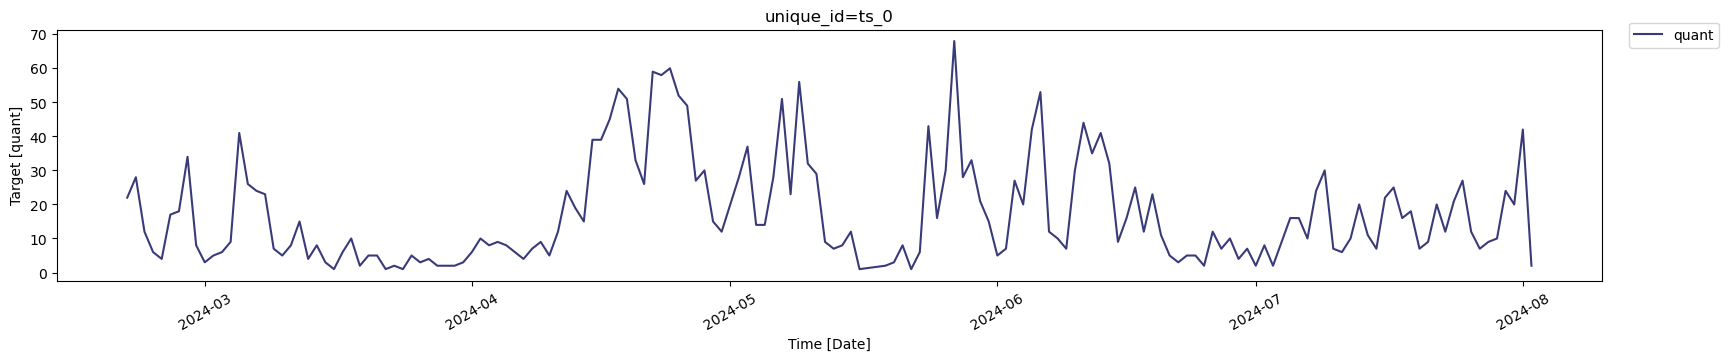

In [53]:
nixtla_client.plot(df_c_s, time_col='Date', target_col='quant')

In [54]:
df_c_s

,SKU,quant,Date
date,,,
2024-02-21,TC251,22,2024-02-21
2024-02-22,TC251,28,2024-02-22
2024-02-23,TC251,12,2024-02-23
2024-02-24,TC251,6,2024-02-24
2024-02-25,TC251,4,2024-02-25
...,...,...,...
2024-07-29,TC251,10,2024-07-29
2024-07-30,TC251,24,2024-07-30
2024-07-31,TC251,20,2024-07-31


In [56]:
#Forecastig a long period into the future

timegpt_fcst_df = nixtla_client.forecast(df=df_c_s, h=12, time_col='Date', target_col='quant')
timegpt_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...


RuntimeError: Could not infer the frequency of the time column. This could be due to inconsistent intervals. Please check your data for missing, duplicated or irregular timestamps